In [ ]:
#OAG = Aggressiv
#Nag = No hate
#CAG = Little hatte

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/agr_en_test.csv')

In [ ]:
df.isnull().sum()

source     0
comment    0
label      0
dtype: int64

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Convert text to lowercase
df['comment'] = df['comment'].str.lower()

# Remove special characters and punctuation
df['comment'] = df['comment'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize the comments into words
df['comment'] = df['comment'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['comment'] = df['comment'].apply(lambda words: [word for word in words if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['comment'] = df['comment'].apply(lambda words: [stemmer.stem(word) for word in words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['comment'] = df['comment'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])

print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                         source  \
0    facebook_corpus_msr_396174   
1    facebook_corpus_msr_422473   
2    facebook_corpus_msr_341422   
3    facebook_corpus_msr_481654   
4    facebook_corpus_msr_427757   
..                          ...   
911  facebook_corpus_msr_322509   
912  facebook_corpus_msr_397216   
913  facebook_corpus_msr_466506   
914  facebook_corpus_msr_441285   
915  facebook_corpus_msr_466859   

                                               comment label  
0    [govern, india, dont, take, strict, action, ch...   NAG  
1    [know, woman, veil, dumb, countri, made, think...   NAG  
2    [गद्दारो, तुमसे, ही, तो, खतरा, है, अबकी, बार, ...   NAG  
3      [think, market, gon, na, sideway, till, result]   NAG  
4    [jago, urjut, jago, save, common, peopl, reduc...   NAG  
..                                                 ...   ...  
911  [illegitim, kid, communist, congressi, pressti...   CAG  
912  [anil, chaurasia, galian, men, bhi, de, sakta,...   OAG  
913  [never,

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with 'comment' column and 'label' column
X = df['comment'].apply(lambda words: ' '.join(words))  # Convert list of words back to text
y = df['label']  # Replace 'label' with your actual label column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6956521739130435


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Preprocessing
X = df['comment']
y = df['label']

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Max sequence length for padding
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_sequence_length, padding='post')

# Build a simple feedforward neural network
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
11/11 [==============================] - 9s 244ms/step - loss: 0.9318 - accuracy: 0.6368 - val_loss: 0.8167 - val_accuracy: 0.7162
Epoch 2/10
11/11 [==============================] - 2s 169ms/step - loss: 0.8611 - accuracy: 0.6839 - val_loss: 0.8113 - val_accuracy: 0.7162
Epoch 3/10
11/11 [==============================] - 2s 188ms/step - loss: 0.8390 - accuracy: 0.6839 - val_loss: 0.8097 - val_accuracy: 0.7162
Epoch 4/10
11/11 [==============================] - 1s 149ms/step - loss: 0.8234 - accuracy: 0.6839 - val_loss: 0.8028 - val_accuracy: 0.7162
Epoch 5/10
11/11 [==============================] - 1s 149ms/step - loss: 0.8045 - accuracy: 0.6839 - val_loss: 0.8006 - val_accuracy: 0.7162
Epoch 6/10
11/11 [==============================] - 2s 217ms/step - loss: 0.7732 - accuracy: 0.6839 - val_loss: 0.8018 - val_accuracy: 0.7162
Epoch 7/10
11/11 [==============================] - 2s 124ms/step - loss: 0.7387 - accuracy: 0.6839 - val_loss: 0.7957 - val_accuracy: 0.7162
Epoch 

Epoch 1/10
11/11 [==============================] - 3s 202ms/step - loss: 0.4758 - accuracy: 0.8009 - val_loss: 0.7756 - val_accuracy: 0.7162
Epoch 2/10
11/11 [==============================] - 2s 185ms/step - loss: 0.4105 - accuracy: 0.8435 - val_loss: 0.7770 - val_accuracy: 0.7162
Epoch 3/10
11/11 [==============================] - 3s 237ms/step - loss: 0.3550 - accuracy: 0.8693 - val_loss: 0.7781 - val_accuracy: 0.7162
Epoch 4/10
11/11 [==============================] - 2s 134ms/step - loss: 0.3063 - accuracy: 0.8967 - val_loss: 0.7754 - val_accuracy: 0.7297
Epoch 5/10
11/11 [==============================] - 1s 144ms/step - loss: 0.2644 - accuracy: 0.9438 - val_loss: 0.7989 - val_accuracy: 0.7297
Epoch 6/10
11/11 [==============================] - 2s 158ms/step - loss: 0.2232 - accuracy: 0.9559 - val_loss: 0.8159 - val_accuracy: 0.7297
Epoch 7/10
11/11 [==============================] - 1s 124ms/step - loss: 0.1860 - accuracy: 0.9529 - val_loss: 0.8033 - val_accuracy: 0.7297
Epoch 

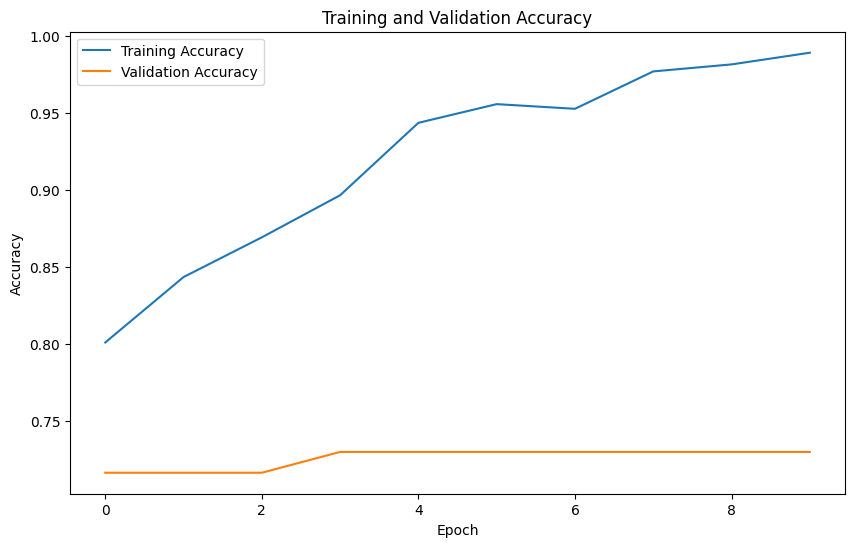

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.callbacks import History

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import TensorBoard

# Define a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with the TensorBoard callback
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,
                    callbacks=[tensorboard_callback])


Epoch 1/10
11/11 [==============================] - 1s 83ms/step - loss: 0.0851 - accuracy: 0.9894 - val_loss: 0.8558 - val_accuracy: 0.7297
Epoch 2/10
11/11 [==============================] - 2s 158ms/step - loss: 0.0712 - accuracy: 0.9954 - val_loss: 0.9093 - val_accuracy: 0.7297
Epoch 3/10
11/11 [==============================] - 1s 69ms/step - loss: 0.0594 - accuracy: 0.9939 - val_loss: 0.8730 - val_accuracy: 0.7297
Epoch 4/10
11/11 [==============================] - 1s 91ms/step - loss: 0.0519 - accuracy: 0.9954 - val_loss: 0.9387 - val_accuracy: 0.7297
Epoch 5/10
11/11 [==============================] - 1s 110ms/step - loss: 0.0440 - accuracy: 0.9954 - val_loss: 0.9333 - val_accuracy: 0.7297
Epoch 6/10
11/11 [==============================] - 1s 86ms/step - loss: 0.0364 - accuracy: 0.9970 - val_loss: 0.9587 - val_accuracy: 0.7297
Epoch 7/10
11/11 [==============================] - 0s 15ms/step - loss: 0.0319 - accuracy: 0.9970 - val_loss: 0.9689 - val_accuracy: 0.7297
Epoch 8/10


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import History, EarlyStopping
import tensorflow as tf

# Compile the model with a learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and a learning rate schedule
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,
                    callbacks=[tensorboard_callback, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
11/11 [==============================] - 3s 174ms/step - loss: 0.0223 - accuracy: 0.9985 - val_loss: 1.0021 - val_accuracy: 0.7162
Epoch 2/10
11/11 [==============================] - 1s 130ms/step - loss: 0.0165 - accuracy: 0.9985 - val_loss: 1.1735 - val_accuracy: 0.7297
Epoch 3/10
11/11 [==============================] - 2s 149ms/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 1.0754 - val_accuracy: 0.7297
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.6957
Test Accuracy: 0.695652186870575


In [ ]:
#BERT

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing


# Preprocess data
X = df['comment']
y = df['label']

# Create a Tokenizer and fit on text data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_encoded = tokenizer.texts_to_sequences(X)
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=128, padding='post', truncating='post')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Label encode the classes
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history=model.fit(X_train, y_train_encoded, epochs=100, batch_size=32)


Epoch 1/100
23/23 [==============================] - 10s 374ms/step - loss: 0.9822 - accuracy: 0.6639
Epoch 2/100
23/23 [==============================] - 13s 560ms/step - loss: 0.8590 - accuracy: 0.6831
Epoch 3/100
23/23 [==============================] - 10s 418ms/step - loss: 0.8436 - accuracy: 0.6872
Epoch 4/100
23/23 [==============================] - 9s 323ms/step - loss: 0.8417 - accuracy: 0.6872
Epoch 5/100
23/23 [==============================] - 3s 149ms/step - loss: 0.8395 - accuracy: 0.6872
Epoch 6/100
23/23 [==============================] - 5s 214ms/step - loss: 0.8379 - accuracy: 0.6872
Epoch 7/100
23/23 [==============================] - 3s 138ms/step - loss: 0.8372 - accuracy: 0.6872
Epoch 8/100
23/23 [==============================] - 2s 105ms/step - loss: 0.8347 - accuracy: 0.6872
Epoch 9/100
23/23 [==============================] - 2s 95ms/step - loss: 0.8327 - accuracy: 0.6872
Epoch 10/100
23/23 [==============================] - 2s 82ms/step - loss: 0.8301 - accur

Epoch 1/100
19/19 [==============================] - 1s 28ms/step - loss: 0.3422 - accuracy: 0.9282 - val_loss: 0.3502 - val_accuracy: 0.9184
Epoch 2/100
19/19 [==============================] - 1s 44ms/step - loss: 0.3366 - accuracy: 0.9299 - val_loss: 0.3473 - val_accuracy: 0.9252
Epoch 3/100
19/19 [==============================] - 1s 31ms/step - loss: 0.3317 - accuracy: 0.9299 - val_loss: 0.3444 - val_accuracy: 0.9252
Epoch 4/100
19/19 [==============================] - 1s 48ms/step - loss: 0.3278 - accuracy: 0.9368 - val_loss: 0.3414 - val_accuracy: 0.9456
Epoch 5/100
19/19 [==============================] - 1s 30ms/step - loss: 0.3215 - accuracy: 0.9316 - val_loss: 0.3387 - val_accuracy: 0.9252
Epoch 6/100
19/19 [==============================] - 1s 32ms/step - loss: 0.3159 - accuracy: 0.9350 - val_loss: 0.3358 - val_accuracy: 0.9456
Epoch 7/100
19/19 [==============================] - 1s 31ms/step - loss: 0.3108 - accuracy: 0.9368 - val_loss: 0.3331 - val_accuracy: 0.9456
Epoch 

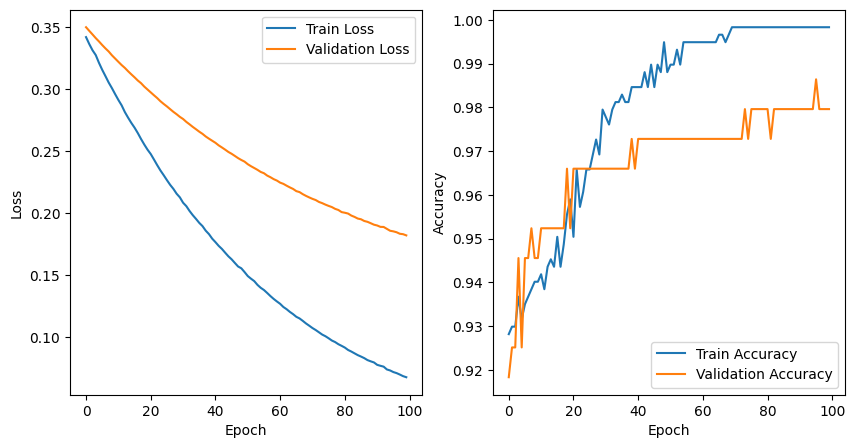

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing

# Load train and gold data
train_data = pd.read_csv('/content/agr_en_train.csv')  # Replace with your train data file
gold_data = pd.read_csv('/content/agr_en_test.csv')    # Replace with your gold data file

# Preprocess data
X_train = train_data['comment']
y_train = train_data['label']
X_gold = gold_data['comment']

# Create a Tokenizer and fit on text data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, maxlen=128, padding='post', truncating='post')

X_gold_encoded = tokenizer.texts_to_sequences(X_gold)
X_gold_padded = tf.keras.preprocessing.sequence.pad_sequences(X_gold_encoded, maxlen=128, padding='post', truncating='post')

# Label encode the classes
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(y_train.unique()), activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the train data
history = model.fit(X_train_padded, y_train_encoded, epochs=100, batch_size=32)

# Predict using the trained model on the gold data
y_gold_pred = model.predict(X_gold_padded)
y_gold_pred_classes = y_gold_pred.argmax(axis=1)
predicted_labels = label_encoder.inverse_transform(y_gold_pred_classes)

# Add predicted labels to the gold data
gold_data['predicted_label'] = predicted_labels

# Save the updated gold data to a new CSV file
gold_data.to_csv('gold_with_predictions.csv', index=False)

Epoch 1/100
375/375 [==============================] - 49s 123ms/step - loss: 1.0637 - accuracy: 0.4292
Epoch 2/100
375/375 [==============================] - 9s 24ms/step - loss: 1.0560 - accuracy: 0.4451
Epoch 3/100
375/375 [==============================] - 8s 22ms/step - loss: 1.0513 - accuracy: 0.4535
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 1.0440 - accuracy: 0.4640
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 1.0356 - accuracy: 0.4829
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 1.0248 - accuracy: 0.4900
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 1.0107 - accuracy: 0.5068
Epoch 8/100
375/375 [==============================] - 2s 6ms/step - loss: 0.9945 - accuracy: 0.5270
Epoch 9/100
375/375 [==============================] - 3s 9ms/step - loss: 0.9746 - accuracy: 0.5496
Epoch 10/100
375/375 [==============================] - 3s 9ms/step - loss: 0.9522 